# Detection of cells with machine learning
# Profiling and understanding images



## Prepare the environment


### Install requirements

In [4]:
!pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.11.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86, 4.12.0.88)
ERROR: No matching distribution found for opencv-python==4.11.0


### Import libraries

In [ ]:

import skimage
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import cv2
import random
import sys
sys.path.append('../scripts')
from load_data import load_data



## Loading images and annotations

In [ ]:
train,valid,test,dict_train,dict_val, dict_test=load_data()

## Profiling of images

### validate image characteristics

In [19]:
all_images = train + valid + test
annotations ={"images": dict_train['images']+ dict_val['images'] + dict_test['images'],
              "categories": dict_train['categories']+dict_val['categories']+ dict_test['categories'],
              "annotations": dict_train['annotations']+dict_val['annotations']+dict_test['annotations']}

image_shapes = []
image_formats = []
image_shapes = []
image_formats = []
category_counter = Counter()
image_id_to_filename = {img['id']: img['file_name'] for img in annotations['images']}
category_id_to_name = {cat['id']: cat['name'] for cat in annotations['categories']}
images_with_annotations = set()


### Review of dataset

We analized every image about size and format. We counted every image and count for each category.

In [30]:
for img in all_images:
    with Image.open(img) as im:
        image_shapes.append(im.size)
        image_formats.append(im.format)

for ann in annotations['annotations']:
    cat_id = ann['category_id']
    category_counter[category_id_to_name[cat_id]] += 1
    images_with_annotations.add(ann['image_id'])

print(f"Total images: {len(annotations['images'])}")
print(f"Image format: {set(image_formats)}")
print(f"Unique image size: {set(image_shapes)}")

Total images: 320
Image format: {'JPEG'}
Unique image size: {(416, 416)}


# show categories distribution

Categories and number of annotations:
  RBC: 10986
  WBC: 993
  Platelets: 957
Images without annotation: 96


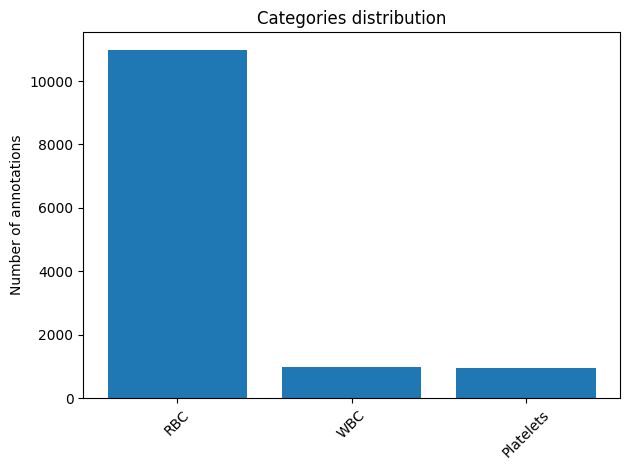

In [31]:

print(f"Categories and number of annotations:")
for k, v in category_counter.items():
    print(f"  {k}: {v}")
print(f"Images without annotation: {len(annotations['images']) - len(images_with_annotations)}")

plt.bar(category_counter.keys(), category_counter.values())
plt.title("Categories distribution")
plt.xticks(rotation=45)
plt.ylabel("Number of annotations")
plt.tight_layout()
plt.show()

### Visualization of some images of all dataset

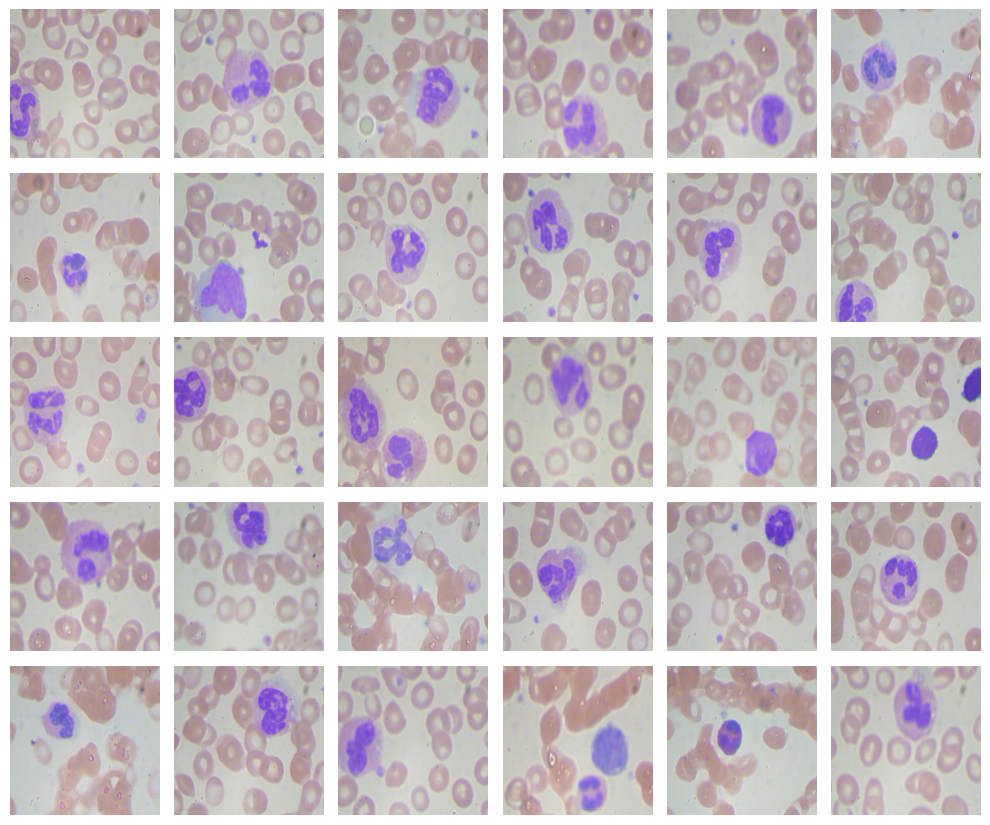

In [32]:
def show_images(images, num_samples=30, cols=6):
    plt.figure(figsize=(10,10))
    idx = int(len(images) / num_samples)

    for i, img in enumerate(images):
        if i % idx == 0:
            plt.subplot(int(num_samples/cols) + 1, cols, int(i/idx) + 1)
            plt.axis('off')
            plt.imshow(skimage.io.imread(img))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    plt.show()

show_images(all_images[:30])

### Review color spaces in images

In this section we will review the color spaces of the images in the dataset. We will convert the images to different color spaces and visualize them. The color spaces we will review are RGB and HSV. We will also visualize the images in original, hsv, Blue, Green, and Red channels and with canny edge detection.


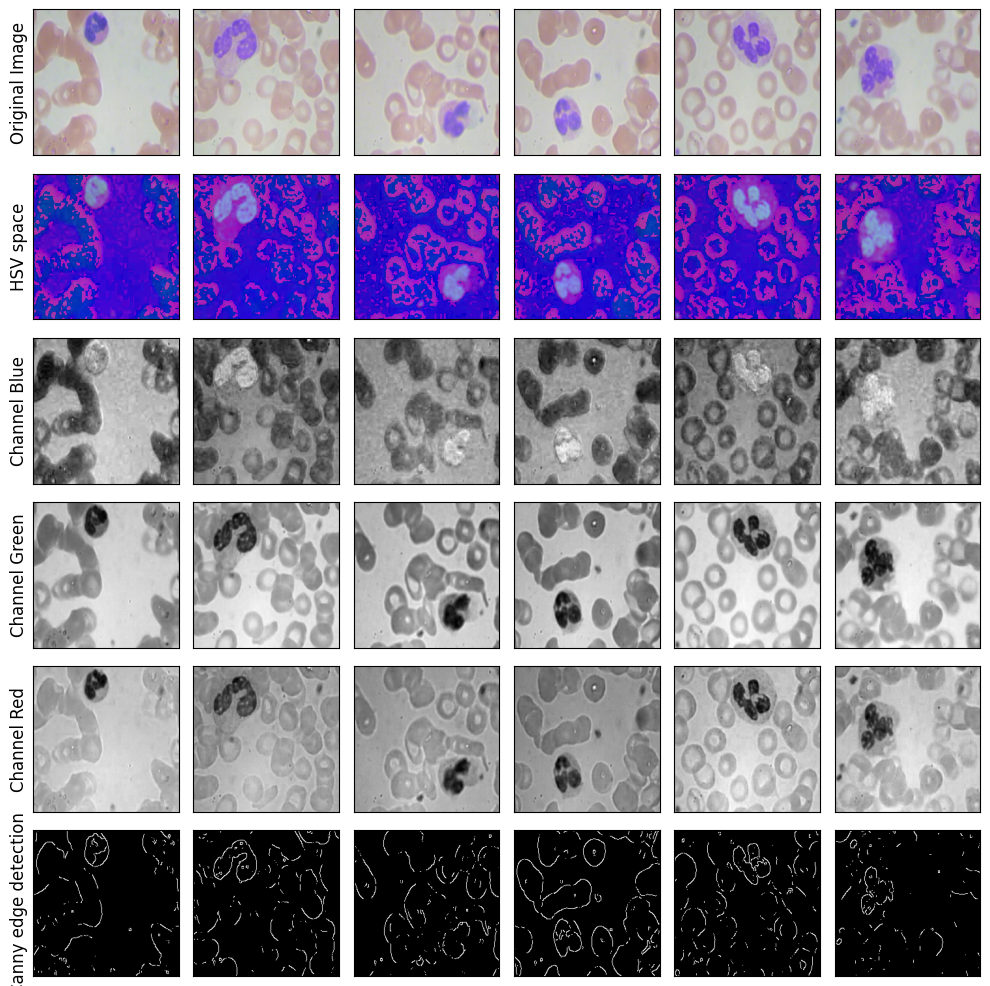

In [79]:
sample_images = random.sample(all_images, 6)

fig, axes = plt.subplots(6, 6, figsize=(10, 10))

row_titles = ['Original Image','HSV space', 'Channel Blue', 'Channel Green', 'Channel Red', 'Canny edge detection']

for col, img_path in enumerate(sample_images):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (224, 224))
    B, G, R = cv2.split(image)
    RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 100, 100)
    images = [RGB,hsv, B, G, R,canny]

    for row in range(6):
        ax = axes[row, col]
        ax.imshow(images[row], cmap='gray' if row > 0 else None)

        if col == 0:
            ax.set_ylabel(row_titles[row], fontsize=12, rotation=90, labelpad=10, va='center')
        ax.set_xticks([])
        ax.set_yticks([])


plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()